In [1]:
# import dependencies
import numpy as np
import pandas as pd

## Linear Regression
#### a) 
Load and preprocess the data using Pandas or Numpy and, if necessary, preprocessing functions from scikit-learn. The provided data is already normalized (see description), so there is no need for additional normalization. 

In [2]:
# read in data
df = pd.read_csv("communities/communities.csv",na_values=["?"], header = 0)
df.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [3]:
#any nan values? we will replace
df.isnull().any().any()

True

In [4]:
df=df.dropna()
df.isnull().any().any()

False

Compute and display basic statistics (mean, standard deviation, min, max, etc.) for each of the variables in the data set. 

In [5]:
#we will drop state numbers and community names as they don't play important roles in our problem.
df.drop(columns=['state','communityname'], inplace=True)
df.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,...,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000
mean,0.057612,0.463437,0.179227,0.753984,0.153753,0.144089,0.424210,0.493914,0.336297,0.423086,...,0.022790,0.215655,0.608776,0.534967,0.626322,0.651470,0.065243,0.232910,0.161741,0.237983
std,0.126935,0.163747,0.252870,0.243807,0.208905,0.232531,0.155234,0.143584,0.166540,0.179196,...,0.100424,0.231146,0.204314,0.181360,0.200520,0.198253,0.109485,0.203127,0.229099,0.233043
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,0.300000,...,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.070000
50%,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,0.420000,...,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.150000
75%,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,0.530000,...,0.000000,0.280000,0.770000,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.330000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df = df.astype(np.float)
X = df.drop(columns=["ViolentCrimesPerPop"])
y = df["ViolentCrimesPerPop"]

Separate the target attribute for regression. Create a 20%-80% randomized split of the data. Set aside the 20% test portion; the 80% training data partition will be used for cross-validation 

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 33)

#### b)
Perform standard linear regression on data using the closed form solution implementation (not the scikit-learn implementation). Compute the RMSE value on the full training data (the 80% partition). Also, plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights) and plot them using matplotlib. Finally, perform 10-fold cross-validation and compare the cross-validation RMSE to the training RMSE (for cross validation, you should use the KFold module from sklearn.model_selection).

In [8]:
def standRegres(xArr, yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [9]:
#Compute the RMSE value on the full training data
w = standRegres(X_train, y_train)

xMat = np.mat(X_train)
yMat = np.mat(y_train)

yHat = xMat * w
yHat = yHat.A.ravel()

In [10]:
err = abs(yHat - y_train)

#sum of squared errors
total_error = np.dot(err,err)

In [11]:
rmse_train = np.sqrt(total_error/len(yHat))
print("RMSE on Training data: ",round(rmse_train,3))

RMSE on Training data:  0.128


Text(0, 0.5, 'Predicted')

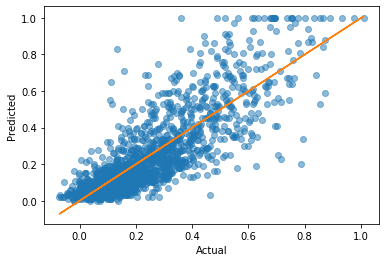

In [12]:
#Also, plot the correlation between the predicted and actual values of the target attribute. 
#Display the obtained regression coefficients (weights) and plot them using matplotlib. 
import matplotlib.pyplot as plt

plt.plot(yHat, y_train, 'o', alpha=0.5)
# m = slope, b=intercept
m, b = np.polyfit(yHat, y_train, 1)
plt.plot(yHat, m*yHat + b)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [13]:
#Display the obtained regression coefficients (weights) and plot them using matplotlib. 
for i in range(len(X_train.columns)):
    print("%7s   %2.2f" % (X_train.columns[i], w[i]))

population   -0.14
householdsize   0.02
racepctblack   0.26
racePctWhite   0.04
racePctAsian   0.02
racePctHisp   0.14
agePct12t21   0.24
agePct12t29   -0.18
agePct16t24   -0.25
agePct65up   0.21
numbUrban   0.07
pctUrban   0.04
medIncome   -0.12
pctWWage   -0.23
pctWFarmSelf   0.03
pctWInvInc   -0.15
pctWSocSec   -0.03
pctWPubAsst   0.04
pctWRetire   -0.06
medFamInc   0.12
perCapInc   0.02
whitePerCap   -0.12
blackPerCap   -0.02
indianPerCap   -0.03
AsianPerCap   0.02
OtherPerCap   0.03
HispPerCap   0.04
NumUnderPov   0.12
PctPopUnderPov   -0.16
PctLess9thGrade   -0.12
PctNotHSGrad   0.08
PctBSorMore   0.11
PctUnemployed   0.05
PctEmploy   0.32
PctEmplManu   -0.02
PctEmplProfServ   -0.01
MalePctDivorce   0.42
MalePctNevMarr   0.27
FemalePctDiv   0.03
TotalPctDiv   -0.33
PersPerFam   -0.08
PctFam2Par   0.08
PctKids2Par   -0.26
PctYoungKids2Par   -0.02
PctTeen2Par   -0.01
PctWorkMomYoungKids   0.07
PctWorkMom   -0.19
NumIlleg   -0.21
PctIlleg   0.17
NumImmig   -0.09
PctImmigRecent   0.0

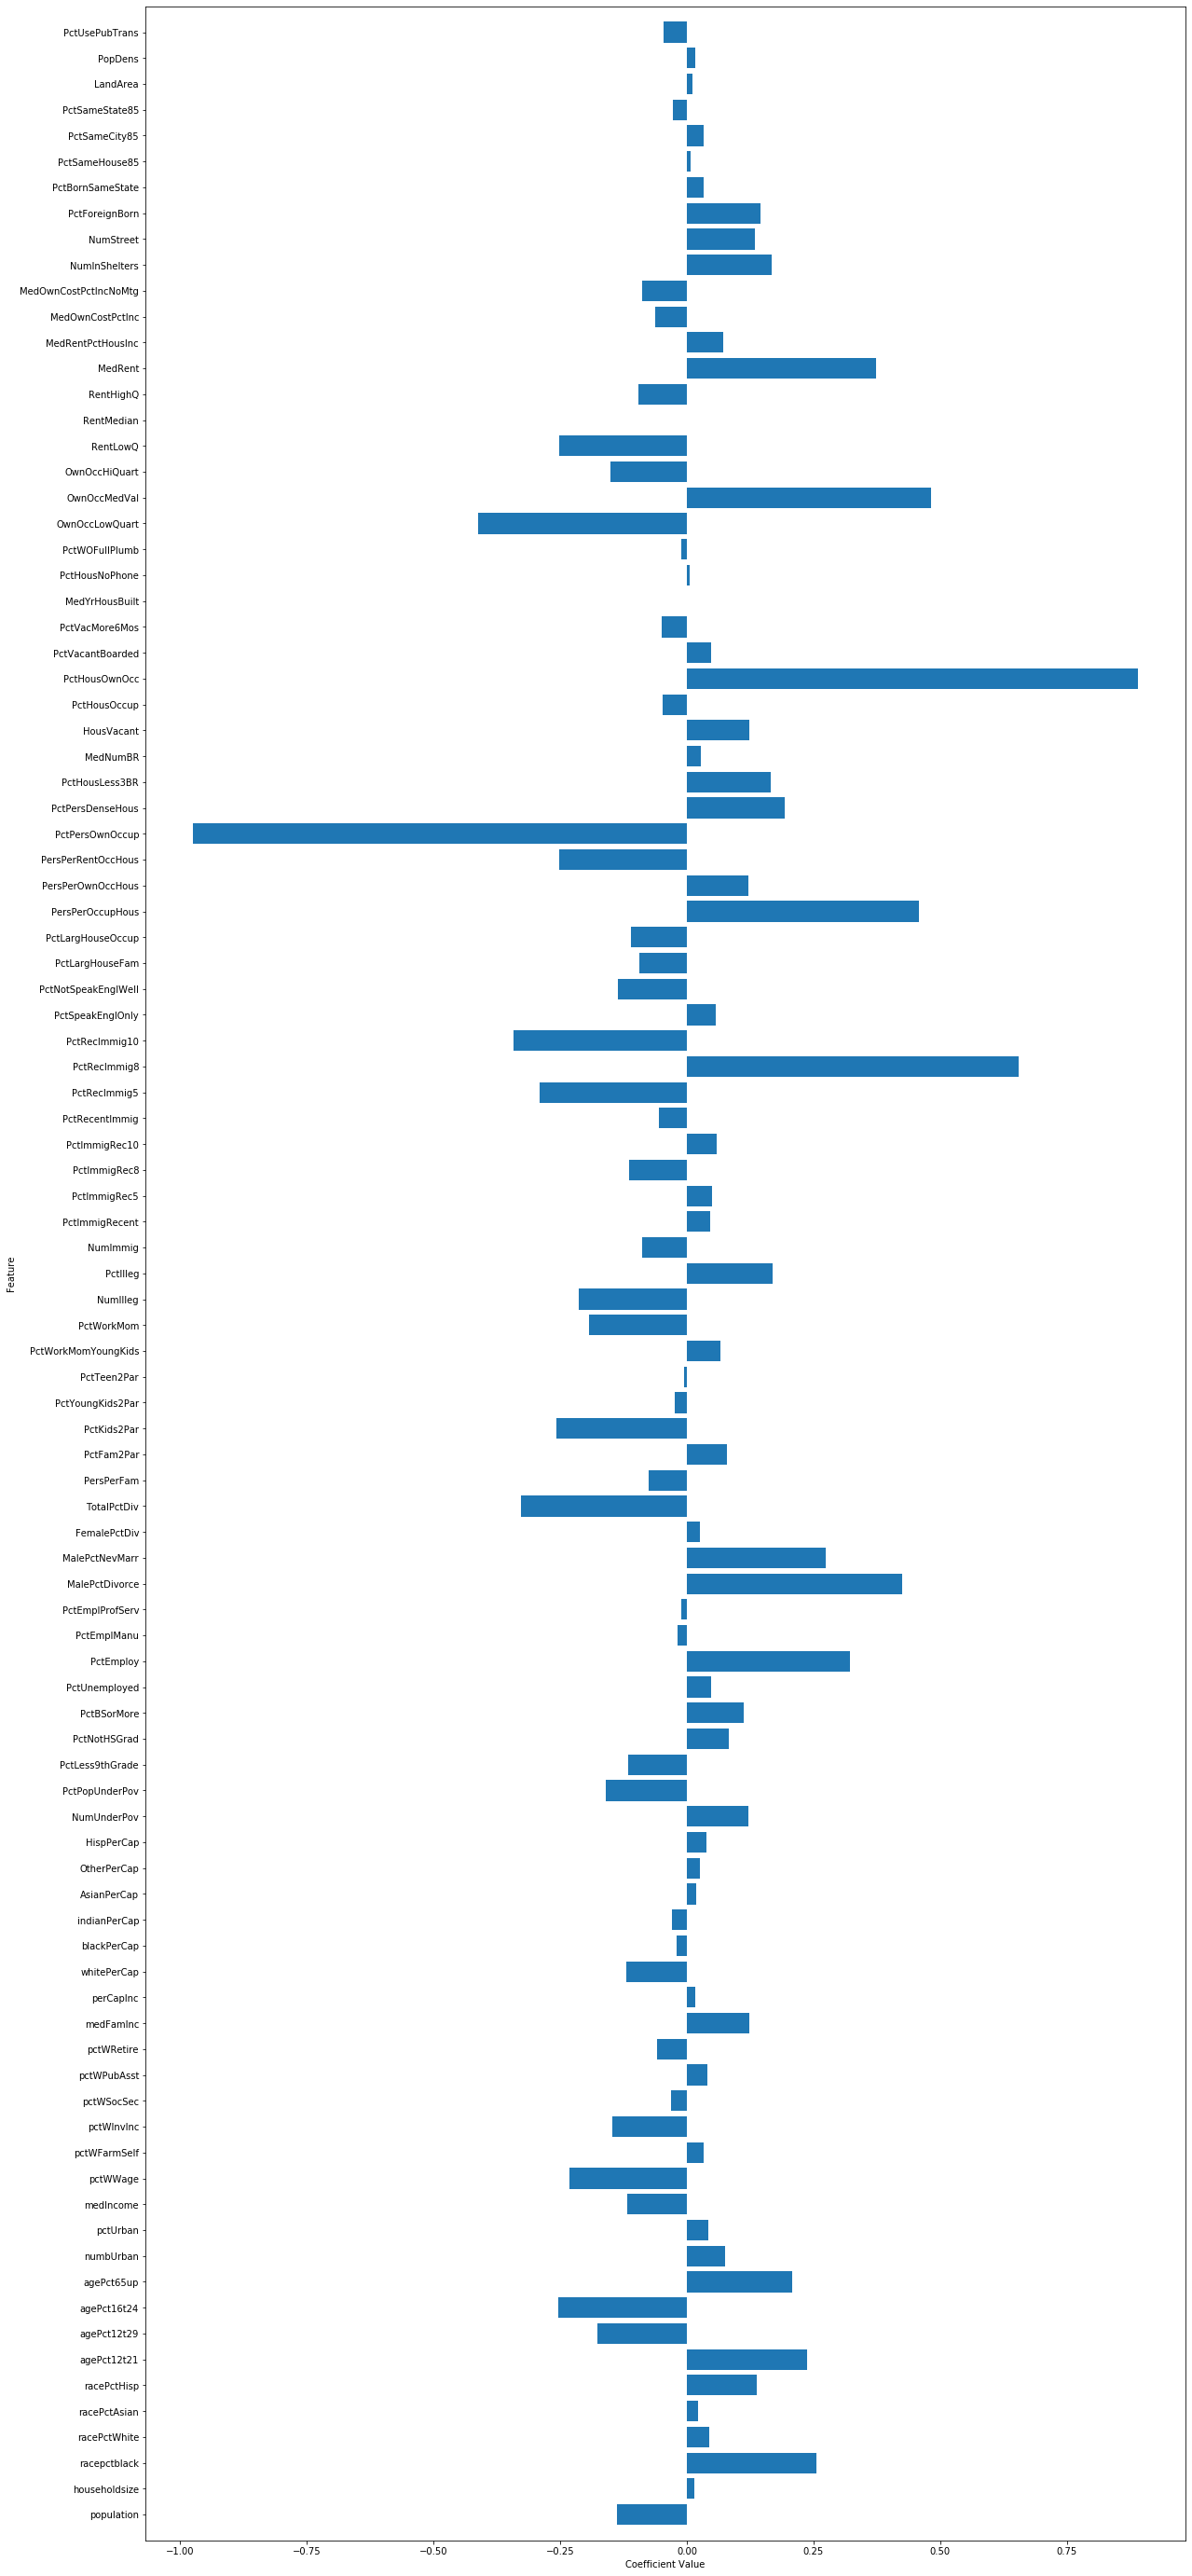

In [14]:
%matplotlib inline

def plot_coefficients(weights, n_features, feature_names):
    plt.rcParams["figure.figsize"] = (20,50)
    plt.barh(range(n_features), weights, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.show()

plot_coefficients(w.A.ravel(), len(X_train.columns), X_train.columns)

Finally, perform 10-fold cross-validation and compare the cross-validation RMSE to the training RMSE (for cross validation, you should use the KFold module from sklearn.model_selection).

In [15]:
from sklearn.model_selection import KFold

n=10

kf = KFold(n_splits = n, random_state=22, shuffle=True)
xval_err = 0
f = 1
for train, test in kf.split(X_train):
    X_fold_train = X_train[X_train.index.isin(train)]
    y_fold_train = y_train[y_train.index.isin(train)]
    w=standRegres(X_fold_train,y_fold_train)
    
    xMat = np.mat(X_fold_train)
    yMat = np.mat(y_fold_train)
    yHat = xMat*w
    yHat = yHat.A.ravel()
    
    err = abs(yHat - y_fold_train)
    total_error = np.dot(err,err)
    
    rmse = np.sqrt(np.dot(err,err)/len(X_fold_train))
    print("Fold %2d RMSE: %.4f" % (f,rmse))
    xval_err += rmse
    f+=1

Fold  1 RMSE: 0.1240
Fold  2 RMSE: 0.1240
Fold  3 RMSE: 0.1275
Fold  4 RMSE: 0.1270
Fold  5 RMSE: 0.1271
Fold  6 RMSE: 0.1230
Fold  7 RMSE: 0.1272
Fold  8 RMSE: 0.1248
Fold  9 RMSE: 0.1250
Fold 10 RMSE: 0.1268


In [16]:
cv=xval_err/n
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f'%cv)

Method: Simple Linear Regression
RMSE on training: 0.1277
RMSE on 10-fold CV: 0.1256


 #### c)
 Feature Selection:  use the scikit-learn regression model from sklearn.linear_model with a subset of features to perform linear regression. For feature selection, write a script or function that takes as input the training data, target variable; the model; and any other parameters you find necessary, and returns the optimal percentage of the most informative features to use. Your approach should use k-fold cross-validation on the training data (you can use k=5). You can use feature_selection.SelectPercentile to find the most informative variables. 

In [17]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet,SGDRegressor
from sklearn import feature_selection
from sklearn.model_selection import cross_val_score, cross_validate

In [18]:
#write a script or function that takes as input the training data, 
#target variable; the model; and any other parameters you find necessary,
linreg = LinearRegression()

percentiles = range(5,101,5)
results = []

for i in percentiles:
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    X_train_fs = fs.fit_transform(X_train, y_train)
    scores = cross_val_score(linreg, X_train_fs,y_train, cv=5)
    print("%2d %0.4f" % (i, scores.mean()))
    results = np.append(results,scores.mean())

 5 0.5933
10 0.5993
15 0.6034
20 0.6151
25 0.6280
30 0.6329
35 0.6359
40 0.6386
45 0.6348
50 0.6327
55 0.6335
60 0.6334
65 0.6309
70 0.6299
75 0.6306
80 0.6323
85 0.6344
90 0.6322
95 0.6387
100 0.6400


In [19]:
# optimal percentage of the most informative features to use
optimal_percentile_ind = np.where(results ==results.max())[0][0]
print(optimal_percentile_ind)

19


Optimal percentile of features:100 

Optimal number of features:97 



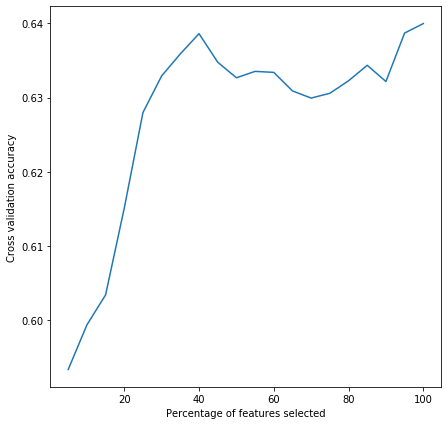

In [20]:
optimal_percentile_ind = np.where(results==results.max())[0][0]
print("Optimal percentile of features:{0}".format(percentiles[optimal_percentile_ind]), "\n")
optimal_num_features = int(percentiles[optimal_percentile_ind] * len(X.columns)/100)
print("Optimal number of features:{0}".format(optimal_num_features), "\n")

import pylab as pl
pl.rcParams["figure.figsize"] = (7,7)
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results)

Show the list of most informative variables and their weights [Note: since this is regression not classification, you should use feature_selection.f_regression as scoring function rather than chi2). 

In [21]:
#fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i) 
most_informative = []
for i in range(len(X.columns.values)):
    if fs.get_support()[i]:
        t = (X.columns.values[i], fs.scores_[i])
        most_informative.append(t)
most_informative.sort(key=lambda x:x[1], reverse=True)

In [22]:
#printing only variables with weights greater than or equal to 100
for i in range(len(most_informative)):
    if most_informative[i][1]>=100:
        print("{0}\t\t{1}\t\t{2}".format(i+1, most_informative[i][0], round(most_informative[i][1],3)))
    else:
        break

1		PctKids2Par		1901.3
2		PctIlleg		1856.85
3		PctFam2Par		1596.839
4		racePctWhite		1304.881
5		PctYoungKids2Par		1269.982
6		PctTeen2Par		1231.321
7		racepctblack		992.164
8		pctWPubAsst		783.224
9		pctWInvInc		761.057
10		FemalePctDiv		693.863
11		TotalPctDiv		677.229
12		PctPersOwnOccup		600.099
13		MalePctDivorce		580.342
14		PctPopUnderPov		569.486
15		PctUnemployed		532.362
16		PctVacantBoarded		489.301
17		PctHousNoPhone		485.842
18		PctNotHSGrad		461.058
19		PctHousOwnOcc		448.759
20		PctHousLess3BR		446.478
21		NumIlleg		399.828
22		medFamInc		374.435
23		NumUnderPov		361.959
24		PctPersDenseHous		348.808
25		medIncome		341.31
26		HousVacant		314.725
27		PctLess9thGrade		296.032
28		NumInShelters		246.135
29		PctLargHouseFam		240.009
30		MedNumBR		237.214
31		population		229.599
32		PctWOFullPlumb		229.041
33		numbUrban		223.617
34		perCapInc		214.969
35		PctEmploy		196.384
36		NumStreet		176.238
37		MedRentPctHousInc		173.167
38		pctWWage		170.554
39		PctBSorMore		169.042
40

Next, plot the model's mean absolute error values  on cross-validation using only the selected features (See scikit-learn's metrics.neg_mean_absolute_error). In order to use cross_val_score with regression you'll need to pass to it scoring='mean_absolute_error' as a parameter. [Hint: for an example of a similar feature selection process please review the class example notebook (though note that the task in this example was classification not regression). Also, review scikit-learn documentation for feature selection.] 

In [23]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=optimal_percentile_ind)
X_train_fs = fs.fit_transform(X_train, y_train)
scores=cross_val_score(linreg, X_train_fs, y_train, cv=5, scoring='neg_mean_absolute_error')
scores=[round(abs(i),5) for i in scores]
print("Scores",scores)
print("Cross-val mean", np.mean(scores))

Scores [0.10341, 0.09797, 0.09789, 0.09862, 0.10723]
Cross-val mean 0.101024


As a final step, train your model on the full 80% training data and evaluate it using the set-aside 20% test partition.

In [24]:
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
p=linreg.predict(X_test)
err = abs(p-y_test)
print(err[:10])

1159    0.199120
1080    0.107321
1634    0.026302
1700    0.237067
1956    0.073282
1808    0.222419
137     0.141683
46      0.014871
1989    0.049865
4       0.047577
Name: ViolentCrimesPerPop, dtype: float64


In [26]:
total_err = np.dot(err,err)
rmse_test = np.sqrt(total_err/len(p))
print("RMSE on Test: ",rmse_test)

RMSE on Test:  0.13710537091581151


#### d)
Next, perform Ridge Regression and Lasso Regression using the modules from sklearn.linear_model. In each case, perform systematic model selection to identify the optimal alpha parameter. You should create a function that takes as input the data and target variable; the parameter to vary and a list of its values; the model to be trained; and any other relevant input needed to determine the optimal value for the specified parameter. The model selection process should perform k-fold cross validation (k should be a parameter, but you can select k=5 for this problem). For each model, you should also plot the error values on the training and cross-validation splits across the specified values of the alpha parameter. Finally, using the best alpha values, train the model on the full training data and evaluate it on the set-aside test data. Discuss your observation and conclusions. 

In [27]:
def calc_params(X, y, clf, param_values, param_name, K):
    
    #Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)
    
    #initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    #iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        
        #set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        #initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        #create KFold cross-validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        #iterate over K folds
        j = 0
        for train, test in cv.split(X):
            #fit the classifier in the corresponding fold
            #and obtain the corresponding accuracy scores on train and test sets
            clf.fit(X[train], y[train])
            k_train_scores[j] = clf.score(X[train], y[train])
            k_test_scores[j] = clf.score(X[test], y[test])
            j += 1
        
        #store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
        print('{} = {}, train score: {}'.format(param_name, param_value, train_scores[i]))
        
    #plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label = "Train", alpha = 0.4, lw = 2, c = 'b')
    plt.plot(param_values, test_scores, label = "X-Val", alpha = 0.4, lw = 2, c = 'g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")
    
    #return the training and testing scores on each parameter value
    return train_scores, test_scores

alpha = 0.01, train score: 0.6963717809913754
alpha = 0.41795918367346935, train score: 0.6921961080871849
alpha = 0.8259183673469387, train score: 0.6894039092160362
alpha = 1.233877551020408, train score: 0.6871659055882333
alpha = 1.6418367346938774, train score: 0.6852879420369937
alpha = 2.0497959183673466, train score: 0.6836681055593086
alpha = 2.457755102040816, train score: 0.6822431533858871
alpha = 2.865714285714285, train score: 0.6809707390199391
alpha = 3.2736734693877545, train score: 0.6798210413256653
alpha = 3.681632653061224, train score: 0.6787722423681462
alpha = 4.0895918367346935, train score: 0.677807885079549
alpha = 4.497551020408163, train score: 0.6769152408865073
alpha = 4.905510204081632, train score: 0.6760842561760333
alpha = 5.313469387755101, train score: 0.6753068473814802
alpha = 5.721428571428571, train score: 0.6745764147176482
alpha = 6.12938775510204, train score: 0.6738874978255774
alpha = 6.537346938775509, train score: 0.6732355262789572
alpha

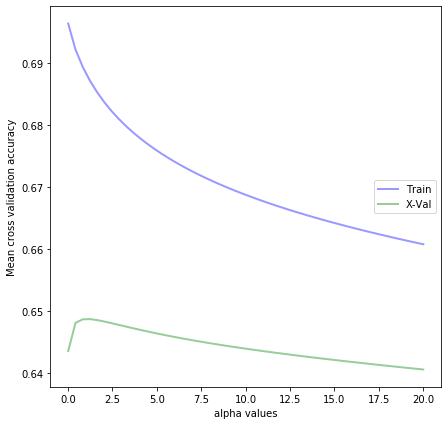

In [28]:
#perform Ridge Regression

alpha = np.linspace(.01, 20, 50)
ridge = Ridge(alpha = alpha)

train_scores, test_scores = calc_params(X_train, y_train, ridge, alpha, 'alpha',5)

In [29]:
print(np.argmax(train_scores))
print(np.argmax(test_scores))

0
3


In [30]:
#Linear regression with Ridge coef
ridge = Ridge(alpha=alpha[2])

ridge.fit(X_train, y_train)

Ridge(alpha=0.8259183673469387, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [31]:
#RMSE on testing data
p = ridge.predict(X_test)
err = p - y_test
total_error = np.dot(err,err)
rmse_test = np.sqrt(total_error/len(p))

print("RMSE on testing (Ridge): ",rmse_test)

RMSE on testing (Ridge):  0.13626861621301484


alpha = 0.0001, train score: 0.6865429330425068
alpha = 0.0009142857142857143, train score: 0.6575210966068837
alpha = 0.0017285714285714285, train score: 0.6463851941913227
alpha = 0.0025428571428571423, train score: 0.6373482994703696
alpha = 0.0033571428571428567, train score: 0.6283823509995645
alpha = 0.004171428571428572, train score: 0.6189776804831746
alpha = 0.004985714285714285, train score: 0.6087253362858884
alpha = 0.0058, train score: 0.5992129394580459
alpha = 0.006614285714285714, train score: 0.5903031904632706
alpha = 0.0074285714285714285, train score: 0.5820836595569603
alpha = 0.008242857142857142, train score: 0.5739670989881993
alpha = 0.009057142857142856, train score: 0.5652970701461688
alpha = 0.00987142857142857, train score: 0.5564053717469697
alpha = 0.010685714285714284, train score: 0.5475210224417036
alpha = 0.011499999999999998, train score: 0.5388862545119688
alpha = 0.012314285714285713, train score: 0.5296178916900266
alpha = 0.013128571428571427, tr

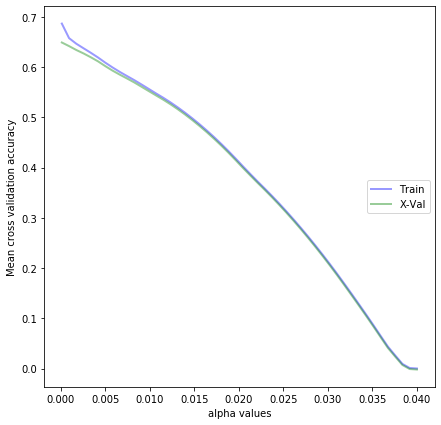

In [32]:
#perform Lasso Regression
alpha = np.linspace(.0001,.04,50)
lasso = Lasso(alpha=alpha)

train_scores, test_scores = calc_params(X_train, y_train, lasso, alpha, 'alpha', 5)

In [33]:
print(np.argmax(train_scores))
print(np.argmax(test_scores))

0
0


In [34]:
lasso = Lasso(alpha = test_scores[0])
lasso.fit(X_train, y_train)

Lasso(alpha=0.6488970957539413, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
#RMSE on test
p = lasso.predict(X_test)
err = p - y_test
total_error = np.dot(err,err)
rmse_test = np.sqrt(total_error/len(p))

print("RMSE on testing using LASSO: ", rmse_test)

RMSE on testing using LASSO:  0.2456818133605803


Linear Regression and Ridge Regression seem to minimize the root-mean-square-error(RMSE) better than Lasso, we would definitely drop Lasso as its RMSE value almost twice as bad as those two.

#### e)
Next, perform regression using Stochastic Gradient Descent for regression. For this part, you should use the SGDRegessor module from sklearn.linear_model. Note that SGDRegessor requires that features be standardized (with 0 mean and scaled by standard deviation). Prior to fiting the model, perform the scaling using StandardScaler from sklearn.preprocessing. 

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_sgd = scaler.transform(X_train)

Your grid search should compare combinations of two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the default to relatively large values, say 10).

In [37]:
from sklearn.model_selection import GridSearchCV

sgdreg = SGDRegressor()

parameters = {
    'penalty': ['l2','l1'],
    'alpha': np.linspace(.01, 20, 50),
}
grid_search = GridSearchCV(sgdreg, parameters, verbose=1, cv =5)

In [38]:
grid_search.fit(X_train_sgd, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    9.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_star...
       1.30646939e+01, 1.34726531e+01, 1.38806122e+01, 1.42885714e+01,
       1.46965306e+01, 1.51044898e+01, 1.55124490e+01, 1.59204082e+01,
       1.63283673e+01, 1.67363265e+01, 1.71442857e+01, 1.75522449e+01,
       1.79602041e+01, 1.83681633e+01, 1.87761224e+01, 1.91840816e+01,
     

In [39]:
best_params = grid_search.best_params_
best_params, grid_search.best_score_

({'alpha': 0.01, 'penalty': 'l2'}, 0.6366034963268697)

In [40]:
sgdreg = SGDRegressor(penalty = best_params['penalty'], alpha = best_params['alpha'])
sgdreg.fit(X_train_sgd,y_train)

scaler.fit(X_test)
X_test_sgd = scaler.transform(X_test)

#Computing RMSE on testing data
p =sgdreg.predict(X_test_sgd)
err = p-y_test
total_error = np.dot(err,err)
rmse_test = np.sqrt(total_error/len(p))
print("SGD RMSE mean on testing: ",np.mean(rmse_test))

SGD RMSE mean on testing:  0.1361001376828774


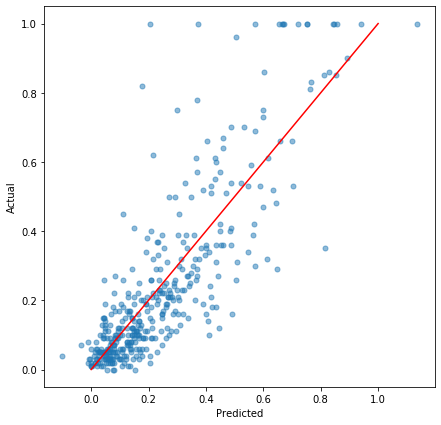

In [41]:
pl.plot(p, y_test, 'o',markersize=5, alpha=.5)
pl.plot([0,1],[0,1],'r-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.show()

Finally, perform model selection (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with  the "elasticnet" penalty parameter. [Note: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1;  l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, apply the Elastic Net model to the set-aside test data. Provide a brief summary of your findings from the above experiments.

l1_ratio = 0.0, train score: 0.6609031469127566
l1_ratio = 0.010101010101010102, train score: 0.6667694633946005
l1_ratio = 0.020202020202020204, train score: 0.6628227887696371
l1_ratio = 0.030303030303030304, train score: 0.6727338701024366
l1_ratio = 0.04040404040404041, train score: 0.6588714788431683
l1_ratio = 0.05050505050505051, train score: 0.6709050155280512
l1_ratio = 0.06060606060606061, train score: 0.672188805155213
l1_ratio = 0.07070707070707072, train score: 0.6730891221464402
l1_ratio = 0.08080808080808081, train score: 0.6717279060105592
l1_ratio = 0.09090909090909091, train score: 0.6659659732050072
l1_ratio = 0.10101010101010102, train score: 0.6683215273113484
l1_ratio = 0.11111111111111112, train score: 0.6737787318998631
l1_ratio = 0.12121212121212122, train score: 0.675854480002403
l1_ratio = 0.13131313131313133, train score: 0.6734255376623232
l1_ratio = 0.14141414141414144, train score: 0.6634004913384188
l1_ratio = 0.15151515151515152, train score: 0.66933523

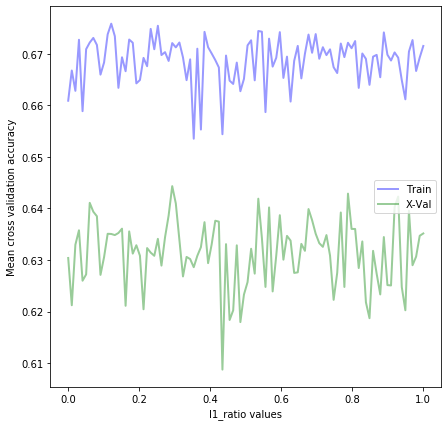

In [42]:
sgdreg = SGDRegressor(penalty='elasticnet')
l1_ratio = np.linspace(0, 1, 100)

train_scores, test_scores = calc_params(X_train_sgd, y_train, sgdreg, l1_ratio, 'l1_ratio', 5)

In [43]:
print('Best l1 ratio: ',l1_ratio[np.argmax(test_scores)])

Best l1 ratio:  0.29292929292929293


In [44]:
best_l1_ratio = l1_ratio[np.argmax(test_scores)]
sgdreg = SGDRegressor(penalty='elasticnet', l1_ratio=best_l1_ratio)

sgdreg.fit(X_train_sgd,y_train)

scaler.fit(X_test)
X_test_sgd = scaler.transform(X_test)

#RMSE on test
p = sgdreg.predict(X_test_sgd)
err = p-y_test
total_error = np.dot(err,err)
rmse_test = np.sqrt(total_error/len(p))
print('SGD RMSE on testing: ', np.mean(rmse_test))

SGD RMSE on testing:  0.13672972843462172


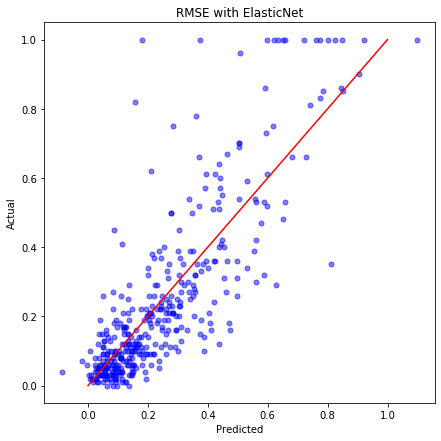

In [45]:
pl.plot(p,y_test, 'bo', markersize=5, alpha=.5)
pl.plot([0,1],[0,1],'r-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.title('RMSE with ElasticNet')
pl.show()

With optimizing hyperparameters, we can update or improve our model's performance in various experiments, however we might work on several parameters to optimize our values on root mean square errors since we do not see any changes with or without hyperparameters, findings on SGDRegressor are pretty similar to the initial ridge regression rmse values. I think tuning hyperparameters are good and we definitely should use in every machine learning projects.

## 2) Automatic Document Clustering

#### a.
Create your own distance function that, instead of using Euclidean distance, uses Cosine similarity. This is the distance function you will use to pass to the kMeans function.

In [65]:
def cos_sim(x, D):
    #find the vector norm for each instance in D and for vector x
    x_norm = np.linalg.norm(x)
    D_norm = np.linalg.norm(D)
    #cosine=dot product of x divide by each instance in D by two products of the norms
    sims = np.dot(x,D)/(x_norm * D_norm)
    
    #distance is the inverse of cos sim
    dists = 1 - sims
    
    return dists

#### b.
Load the data set [Note: the data matrix provided has terms as rows and documents as columns. Since you will be clustering documents, you'll need to take the transpose of this matrix so that your main data matrix is a document x term matrix. In Numpy, you may use the ".T" operation to obtain the transpose.] Then, split the data set (the document x term matrix) and set aside 20% for later use (see below). Use the 80% segment for clustering in the next part. The 20% portion must be a random subset.

In [66]:
matrix_data = pd.DataFrame(np.genfromtxt('newsgroups5/matrix.txt', delimiter=',', dtype=int).T)
matrix_data.shape

(2500, 9328)

In [67]:
terms = pd.read_table('newsgroups5/terms.txt', sep = '\n', header=None)
terms.head()

,0
0,aa
1,aargh
2,aaron
3,aaronc
4,ab


In [68]:
classes = np.genfromtxt('newsgroups5/classes.txt', delimiter=' ', dtype=int, skip_header=1, usecols=(1))
classes[:5]

array([0, 1, 1, 1, 2])

In [69]:
X_train, X_test, y_train, y_test = train_test_split(matrix_data, classes, test_size = 0.2, random_state = 33)
X_train.shape

(2000, 9328)

#### c.
Perform Kmeans clustering on the training data.Write a function to display the top N terms in each cluster along with the cluster DF values for each term and the size of the cluster. The cluster DF value for a term t in a cluster C is the percentage of docs in cluster C in which term t appears (so, if a cluster has 500 documents, and term "game" appears in 100 of those 500 documents, then DF value of "game" in that cluster is 0.2 or 20%). Sort the terms for each cluster in decreasing order of the DF percentage.

In [70]:
from numpy import *

def distEuclid(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2)))#la.norm(vecA-vecB)

In [71]:
def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = mat(zeros((k, n))) 
    for j in range(n): #create random cluster centers
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = mat(minJ + rangeJ * random.rand(k,1))
    return centroids

In [72]:
def kMeans(dataSet, k,distMeas=distEuclid, createCent = randCent):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2))) # create mat to assign data points
                                       # to a centroid, als o holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged: 
        clusterChanged= False
        for i in range(m): #for each data point assign it to the cluster centroid
            minDist = inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:], dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged=True
            clusterAssment[i,:] = minIndex, minDist ** 2
        #print centroids
        for cent in range(k): # recalculate centroids
            num_pts_in_cluster = dataSet[nonzero(clusterAssment[:,0] == cent)[0]]
            if(len(num_pts_in_cluster) != 0):
                centroids[cent,:] = mean(num_pts_in_cluster, axis = 0)
    return centroids, clusterAssment

In [73]:
X_train_np = X_train.to_numpy()
centroids, clusters = kMeans(X_train_np, 5, cos_sim, randCent)

Write a function to display the top N terms in each cluster along with the cluster DF values for each term and the size of the cluster. The cluster DF value for a term t in a cluster C is the percentage of docs in cluster C in which term t appears (so, if a cluster has 500 documents, and term "game" appears in 100 of those 500 documents, then DF value of "game" in that cluster is 0.2 or 20%). Sort the terms for each cluster in decreasing order of the DF percentage.

In [74]:
clusters_arr = []

def output_freq(clusters, centroids, terms, n_top, n_clusters):
    terms_conv = pd.Series(terms[0], name = 'term')
    clusters_conv = pd.DataFrame(clusters)
    clusters_conv.columns = ['cluster', 'error']
    results = {}
    
    for i in range(n_clusters):
        cluster_index = np.array(clusters_conv.index[clusters_conv.iloc[:,0] == i])
        centroid = centroids[i]
        centroid = pd.Series(np.array(centroid).ravel(), name = 'value')
        
        # match term with its centroid
        term_cent = pd.concat([terms_conv, centroid], axis=1)
        
        #cluster seperate
        cluster = term_cent.iloc[cluster_index]
        doc_cluster = len(cluster_index)
        cluster_dict = {'cluster': i,
                       'n': doc_cluster,
                       'terms': cluster.sort_values(by='value', axis=0, ascending=False,inplace=False)}
        clusters_arr.append(cluster_dict)
        
        # sort, take n top of word
        top = cluster.sort_values(by='value', axis=0, ascending=False, inplace=False).head(n_top)
        
        #iterate through each top_n word
        word=[]
        words_collect = []
        
        for t in top.itertuples():
            word.append(t.term)
            word.append(round(t.value * doc_cluster, 3))
            word.append(round(t.value * 100, 3))
            words_collect.append(word)
            word =[]
        results.update({i:(doc_cluster, words_collect)})
        
        words_collect=[]
        #dict = {cluster:no of doc, [[term,freq,%docs],...]}
    return results
top_terms = output_freq(clusters, centroids, terms, 10, 5)

In [75]:
# displaying top terms
for key in top_terms:
    num, words = top_terms[key][0], top_terms[key][1]
    print("Cluster: {0}, no of documents:{1}\n".format(key,num))
    print("Word\t\tFrequency\t%Docs\n")
    for w in words:
        t,f,d = w[0],w[1],w[2]
        print("{0}\t\t{1}\t\t{2}".format(t,f,d))
    print("\n")

Cluster: 0, no of documents:7

Word		Frequency	%Docs

avail		2.0		28.571
archiv		1.0		14.286
american		0.0		0.0
backup		0.0		0.0
boil		0.0		0.0
butt		0.0		0.0
combin		0.0		0.0


Cluster: 1, no of documents:1572

Word		Frequency	%Docs

articl		711.0		45.229
christian		599.0		38.104
db		554.0		35.242
chip		439.0		27.926
believ		420.0		26.718
clipper		374.0		23.791
call		373.0		23.728
church		370.0		23.537
comput		363.0		23.092
ask		319.0		20.293


Cluster: 2, no of documents:6

Word		Frequency	%Docs

ashton		0.0		0.0
atlanta		0.0		0.0
bo		0.0		0.0
broken		0.0		0.0
cypherpunk		0.0		0.0
dcsedacuk		0.0		0.0


Cluster: 3, no of documents:25

Word		Frequency	%Docs

belfour		3.0		12.0
bri		3.0		12.0
current		2.0		8.0
bunch		1.0		4.0
caralvautotrolcom		0.0		0.0
csindianaedu		0.0		0.0
cramp		0.0		0.0
coptic		0.0		0.0
collin		0.0		0.0
claudiu		0.0		0.0


Cluster: 4, no of documents:390

Word		Frequency	%Docs

cup		126.0		32.308
boston		85.0		21.795
bruin		84.0		21.538
coach		77.0		19.744
dai		47.

#### d. 
Using the cluster assignments from Kmeans clustering, compare your 5 clusters to the 5 pre-assigned classes by computing the Completeness and Homogeneity values.

In [76]:
from sklearn.metrics import completeness_score, homogeneity_score
transformed_cluster = np.ravel(clusters.T[0])
print("Completeness value: ", round(completeness_score(y_train,transformed_cluster),3))
print("Homogeneity value: ", round(homogeneity_score(y_train,transformed_cluster),3))

Completeness value:  0.697
Homogeneity value:  0.26


#### e.
Finally, using your cluster assignments as class labels, categorize each of the documents in the 20% set-aside data into each of the appropriate cluster. Your categorization should be based on Cosine similarity between each test document and cluster centroids. For each test document show the predicted class label as well as Cosine similarity to the corresponding cluster.

In [77]:
X_test_cat = X_test.to_numpy()
cos_dist = 1-cos_sim(X_test_cat,centroids.T)
cos_dist

matrix([[8.74994540e-08, 1.42197503e-07, 3.55070248e-08, 1.17173182e-07,
         1.06589357e-07],
        [7.34234549e-07, 1.16917382e-06, 7.98908059e-08, 9.29928980e-07,
         6.97644755e-07],
        [5.24996724e-07, 1.08062648e-07, 4.43837810e-08, 8.30864381e-08,
         9.08843270e-08],
        ...,
        [1.36955667e-07, 1.38741667e-07, 3.10686468e-08, 1.53390347e-07,
         8.18027226e-08],
        [3.38584844e-07, 4.21713681e-07, 8.87675621e-08, 2.40737628e-07,
         3.32946640e-07],
        [4.18475650e-08, 3.94202513e-08, 5.32605372e-08, 4.58040620e-08,
         3.42779355e-08]])

In [78]:
sim_dict = {}
for i in range(len(cos_dist)):
    m = np.argmax(cos_dist[i])
    sim_dict.update({i:(m,ravel(cos_dist[i])[m])})
    print("Cluster: {}, Cosine similarity: {}".format(sim_dict[i][0],sim_dict[i][1]))

Cluster: 1, Cosine similarity: 1.42197502994712e-07
Cluster: 1, Cosine similarity: 1.1691738224239856e-06
Cluster: 0, Cosine similarity: 5.249967240938958e-07
Cluster: 3, Cosine similarity: 6.561698185914011e-07
Cluster: 3, Cosine similarity: 2.6097663241575475e-07
Cluster: 1, Cosine similarity: 7.204910651426033e-07
Cluster: 4, Cosine similarity: 8.759309891859246e-07
Cluster: 1, Cosine similarity: 2.297961791963843e-07
Cluster: 1, Cosine similarity: 1.8674052355560633e-06
Cluster: 3, Cosine similarity: 2.066508844045245e-07
Cluster: 1, Cosine similarity: 3.263224327421099e-07
Cluster: 0, Cosine similarity: 1.0652107440556335e-07
Cluster: 0, Cosine similarity: 2.8912863070384986e-07
Cluster: 2, Cosine similarity: 1.6954604350472025e-06
Cluster: 0, Cosine similarity: 7.228215770371804e-08
Cluster: 0, Cosine similarity: 3.880410569534476e-07
Cluster: 0, Cosine similarity: 6.086918540315622e-07
Cluster: 1, Cosine similarity: 3.2974438834987296e-07
Cluster: 1, Cosine similarity: 1.2617190

In [79]:
test_predicted = []
for i in range(len(cos_dist)):
    test_predicted.append(np.argmax(cos_dist[i]))

In [80]:
test_array = np.array(test_predicted)
print("Cluster 0: ",len(np.where(test_array == 0)[0]))
print("Cluster 1: ",len(np.where(test_array == 1)[0]))
print("Cluster 2: ",len(np.where(test_array == 2)[0]))
print("Cluster 3: ",len(np.where(test_array == 3)[0]))
print("Cluster 4: ",len(np.where(test_array == 4)[0]))

Cluster 0:  129
Cluster 1:  198
Cluster 2:  10
Cluster 3:  87
Cluster 4:  76


In [81]:
centroids.shape

(5, 9328)